# <center>IBM WolfPack</center>

<img style="float: center;" src="https://github.com/team-wolfpack/Predicting-Customer-Churn-with-Watson-Data-Platform/blob/master/Documents/Team%20%23WolfPack-01.png?raw=true">


# <center><span style="color:blue">Predicting Customer Churn with Watson Studio </span></center>

## A bit about Jupyter notebook cell types.

The behavior of a cell is determined by a cell’s type. 

The different types of cells include:

**Code**: Where you can edit and write new code.

**Markdown**: Where you can document the computational process. You can input headings to structure your notebook hierarchically.

**Raw NBConvert**:  Where you can write output directly or put code that you don’t want to run. Raw cells are not evaluated by the notebook.

For the purpose of this lab, a heading will be added but all further notes will be inline with the code by using #.  An example of using Markdown will follow.

If you want to learn more about markdown then check this out:
[Mark Down Cheatseet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## Table of contents

1. [Step 1: R Libraries](#RLibraries)<br/>
2. [Step 2: Reproducible Results](#RR)<br/>
3. [Step 3: Download Data](#download)<br/>
4. [Step 4: Read data into R DataFrame](#getdata)<br/>
5. [Step 5: Prepare Training & Testing Data](#train)<br/>
6. [Step 6: Decision Tree Classifier](#dt)<br/>
7. [Step 7: Random Forest Classifier](#rf)<br/>

<a id="RLibraries"></a>
# <span style="color:#fa04d9"> Step 1: R Libraries</span>

Many R functions come in packages, which are free libraries of code written by R's active user community.  There are thousands of helpful R packages but this lab will only require the following:

**caret**: Package of useful functions that help streamline the model building and evaluation process.

**randomForest**: Classification and regression based on a forest of trees using random inputs.

**rpart**: Recursive partitioning for classification, regression and survival trees. An implementation of most of the functionality of the 1984 book by Breiman, Friedman, Olshen and Stone.

**rpart.plot**:Plot 'rpart' models. Extends plot.rpart() and text.rpart() in the 'rpart' package.

**e1071**: Functions for latent class analysis, short time Fourier transform, fuzzy clustering, support vector machines, shortest path computation, bagged clustering, naive Bayes classifier.


In [1]:
# Install required libraries if not already present
# This step can take up to 1-2 minutes.

if(!require(caret)){
  install.packages("caret")
  print ('Package [caret] successfully installed.')
  library(caret)
  print ('[caret] loaded.')
} else {
  print('Package [caret] already installed.')
  library(caret)
  print ('[caret] loaded.')
}

if(!require(randomForest)){
  install.packages("randomForest")
  print ('Package [randomForest] successfully installed.')
  library(randomForest)
  print ('[randomForest] loaded.')
} else {
  print('Package [randomForest] already installed.')
  library(randomForest)
  print ('[randomForest] loaded.')
}

if(!require(rpart)){
  install.packages("rpart")
  print ('Package [rpart] successfully installed.')
  library(rpart)
  print ('[rpart] loaded.')
} else {
  print('Package [rpart] already installed.')
  library(rpart)
  print ('[rpart] loaded.')
}

if(!require(rpart.plot)){
  install.packages("rpart.plot")
  print ('Package [rpart.plot] successfully installed.')
  library(rpart.plot)
  print ('[rpart.plot] loaded.')
} else {
  print('Package [rpart.plot] already installed.')
  library(rpart.plot)
  print ('[rpart.plot] loaded.')
}

if(!require(e1071)){
  install.packages("e1071")
  print ('Package [e1071] successfully installed.')
  library(e1071)
  print ('[e1071] loaded.')
} else {
  print('Package [e1071] already installed.')
  library(e1071)
  print ('[e1071] loaded.')
}

if(!require(dplyr)){
  install.packages("dplyr")
  print ('Package [dplyr] successfully installed.')
  library(e1071)
  print ('[dplyr] loaded.')
} else {
  print('Package [dplyr] already installed.')
  library(e1071)
  print ('[dplyr] loaded.')
}

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


[1] "Package [caret] already installed."
[1] "[caret] loaded."


Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



[1] "Package [randomForest] already installed."
[1] "[randomForest] loaded."


Loading required package: rpart


[1] "Package [rpart] already installed."
[1] "[rpart] loaded."


Loading required package: rpart.plot


[1] "Package [rpart.plot] already installed."
[1] "[rpart.plot] loaded."


Loading required package: e1071


[1] "Package [e1071] already installed."
[1] "[e1071] loaded."


Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "Package [dplyr] already installed."
[1] "[dplyr] loaded."


<a id="RR"></a>
# <span style="color:#fa04d9"> Step 2: Reproducible Results</span>

In [2]:
# Ensure the process is reproducible
# Generally, in statistics, samples are chosen at random.  A random number generator 
# is used to select the samples and is based off of a seed value.  The seed is 
# explicitly set so results are reproducible. To ensure everyone retrieves the same 
# results in this lab, the seed value was randomly chosen as 3482.
set.seed(3842)

<a id="download"></a>
# <span style="color:#fa04d9"> Step 3: Download Data</span>

In [3]:
# Instantiate the R “fileUrl” object with url path to data.
fileUrl <- 'https://raw.githubusercontent.com/team-wolfpack/Predicting-Customer-Churn-with-Watson-Data-Platform/master/Data/customer_churn.csv'

# Download data using the “download.file” command.
download.file(fileUrl,destfile="customer_churn.csv",mode="w")

<a id="getdata"></a>
# <span style="color:#fa04d9"> Step 4: Read Data into R Dataframe / Simple Analysis</span>

In [4]:
# Read the data into a data.frame
custDataRaw <- read.csv("customer_churn.csv",as.is=TRUE);

In [5]:
# Primary data set row count
cat(sprintf("[custDataRaw] has %d rows:\n", nrow(custDataRaw)))

[custDataRaw] has 2066 rows:


In [6]:
# Summary Stats for entire data set
summary(custDataRaw)

       ID           CHURN            Gender             Status         
 Min.   :   1.0   Mode :logical   Length:2066        Length:2066       
 1st Qu.: 973.2   FALSE:1225      Class :character   Class :character  
 Median :1880.5   TRUE :841       Mode  :character   Mode  :character  
 Mean   :1902.8                                                        
 3rd Qu.:2833.8                                                        
 Max.   :3825.0                                                        
    Children       Est.Income         Car.Owner              Age       
 Min.   :0.000   Min.   :    96.33   Length:2066        Min.   :12.33  
 1st Qu.:0.000   1st Qu.: 21021.60   Class :character   1st Qu.:30.36  
 Median :1.000   Median : 55860.00   Mode  :character   Median :45.53  
 Mean   :1.146   Mean   : 51514.07                      Mean   :42.78  
 3rd Qu.:2.000   3rd Qu.: 78000.00                      3rd Qu.:54.01  
 Max.   :2.000   Max.   :120000.00                      Max.   :

<a id="train"></a>
# <span style="color:#fa04d9"> Step 5: Prepare Training & Testing Data</span>

In [7]:
# Create index of data rows to faciliate partitioning
# The createDataPartition function will randomly pick 90% of the rows which will be used for training/testing data sets
# 10% will be left out for a validation data set
trainIndex_temp <- createDataPartition(y= custDataRaw$CHURN, p=0.9, list = FALSE)

# 10% data goes in here (validation)
# Notice the "-" symbol to indicate "not" the 90%
validation  <- custDataRaw[-trainIndex_temp,]

# This now becomes our working data for training and testing
temp_hold <- custDataRaw[trainIndex_temp,]
# Rename it to something friendly
custDataRaw <- temp_hold

# The remaining data will be split again for training and testing data
trainIndex <- createDataPartition(y= temp_hold$CHURN, p=0.8, list = FALSE)
train <- temp_hold[trainIndex,]
test <- temp_hold[-trainIndex,]
# 80% for training
# 20% for testing



In [8]:
# Training and Testing data sets row counts
cat(sprintf("[train] has %d rows:\n", nrow(train)))
cat(sprintf("[test] has %d rows:\n", nrow(test)))
cat(sprintf("[validation] has %d rows:\n", nrow(validation)))

[train] has 1489 rows:
[test] has 371 rows:
[validation] has 206 rows:


<a id="dt"></a>
# <span style="color:#fa04d9"> Step 6: Decision Tree Classifier</span>

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) 
to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, 
data mining and machine learning. 

If you want to learn more about the decision trees then check this out:
[Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [9]:
# Using the training data (train), create a classification tree.
# The target is "CHURN", the predictors are every other variable except ID.
# The target is cast from boolean to a character for ease of model interpretation.

fitCART <- rpart(as.character(CHURN) ~ Gender + Status + Children + Est.Income +
                 Car.Owner + Age + LongDistance + International + Local +
                 Dropped + Paymethod + LocalBilltype + LongDistanceBilltype +
                 Usage + RatePlan,
             data = train,
             method="class")

# The resulting model is placed into an object called "fitCart"

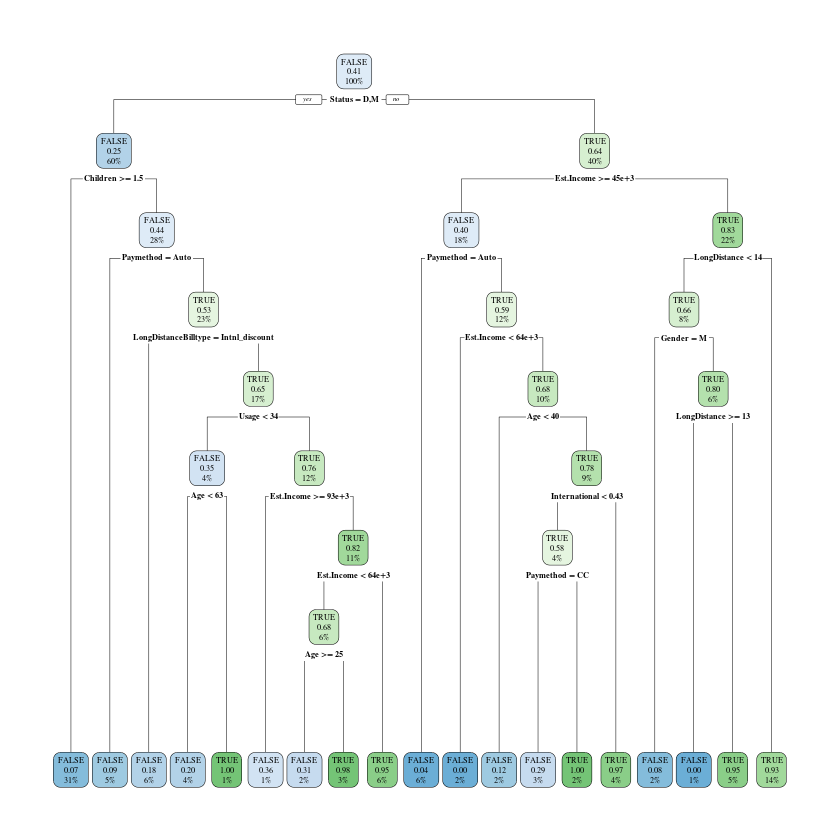

In [10]:
# The rpart.plot library helps us visualize the resulting tree.
rpart.plot(fitCART)

Each node shows
- the predicted class (CHURN)
- the predicted probability of CHURN
- the percentage of observations in the node

In [11]:
# Using the "predict" function we measure our model's performance using the test data
prediction <- predict(fitCART,test,type="class")

In [12]:
# Show side by side, the actual outcome vs. the predictied outcome
finalResults <- data.frame(Actual = test$CHURN, Predicted = prediction)

In [13]:
# Taking a peek at the resulting data frame
head(finalResults[order(finalResults$Actual, decreasing=TRUE), ], 10)

,Actual,Predicted
12,TRUE,TRUE
20,TRUE,TRUE
23,TRUE,FALSE
43,TRUE,FALSE
47,TRUE,FALSE
54,TRUE,TRUE
76,TRUE,TRUE
78,TRUE,FALSE
80,TRUE,TRUE
102,TRUE,TRUE


## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

If you want to learn more about the confusion matrix then check this out:
[Confusion Matrix Cheatseet](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

In [14]:
# Overall, how well did our model perform?
confusionMatrix(prediction, test$CHURN)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   216   37
     TRUE      4  114
                                          
               Accuracy : 0.8895          
                 95% CI : (0.8531, 0.9195)
    No Information Rate : 0.593           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7629          
 Mcnemar's Test P-Value : 5.806e-07       
                                          
            Sensitivity : 0.9818          
            Specificity : 0.7550          
         Pos Pred Value : 0.8538          
         Neg Pred Value : 0.9661          
             Prevalence : 0.5930          
         Detection Rate : 0.5822          
   Detection Prevalence : 0.6819          
      Balanced Accuracy : 0.8684          
                                          
       'Positive' Class : FALSE           
                                          

<a id="rf"></a>
# <span style="color:#fa04d9"> Step 6: Random Forest Classifier</span>

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

If you want to learn more about Random Forests then check this out:
[Random Forests](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)


In [15]:
# Convert "char" data to factors. Required for randomForest package.
custDataRaw=custDataRaw %>% mutate_if(is.character, as.factor)

# Fit Random Forest model
fitRandomForests <- randomForest(as.factor(CHURN) ~ Gender + Status + Children + Est.Income +
                    Car.Owner + Age + LongDistance + International + Local +
                    Dropped + Paymethod + LocalBilltype + LongDistanceBilltype +
                    Usage + RatePlan,
                    data=custDataRaw,
                    importance=TRUE,
                    ntree=100,
                    mtry=3
                    )

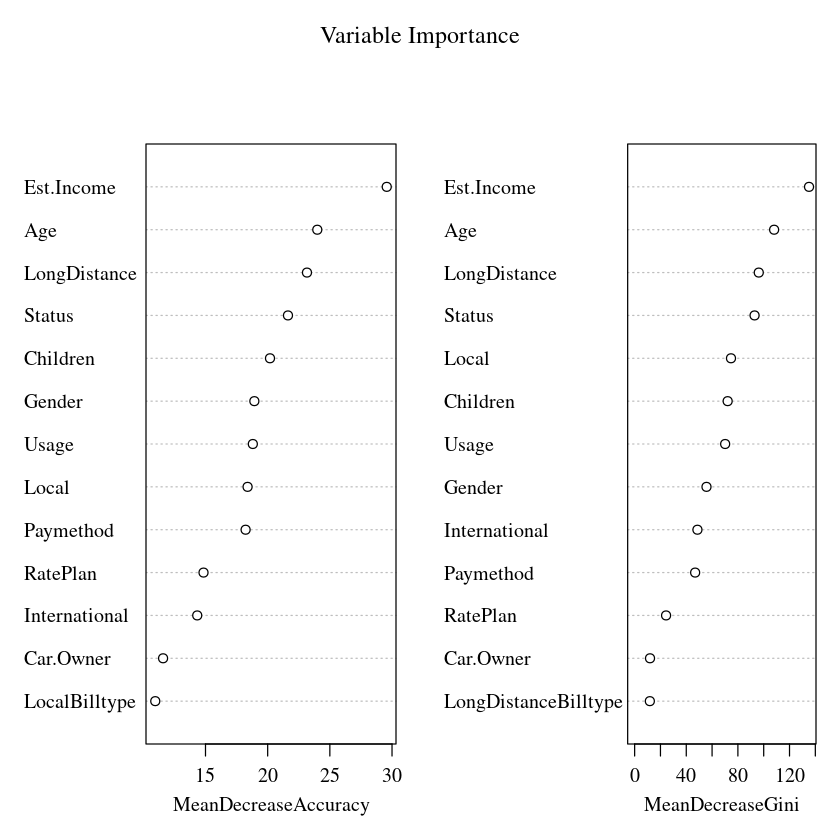

In [16]:
# A nice feauture of Random Forests is that it provides an easy lens into the most important features.
varImpPlot(fitRandomForests, 
           sort=T,
           main="Variable Importance",
           n.var=13)

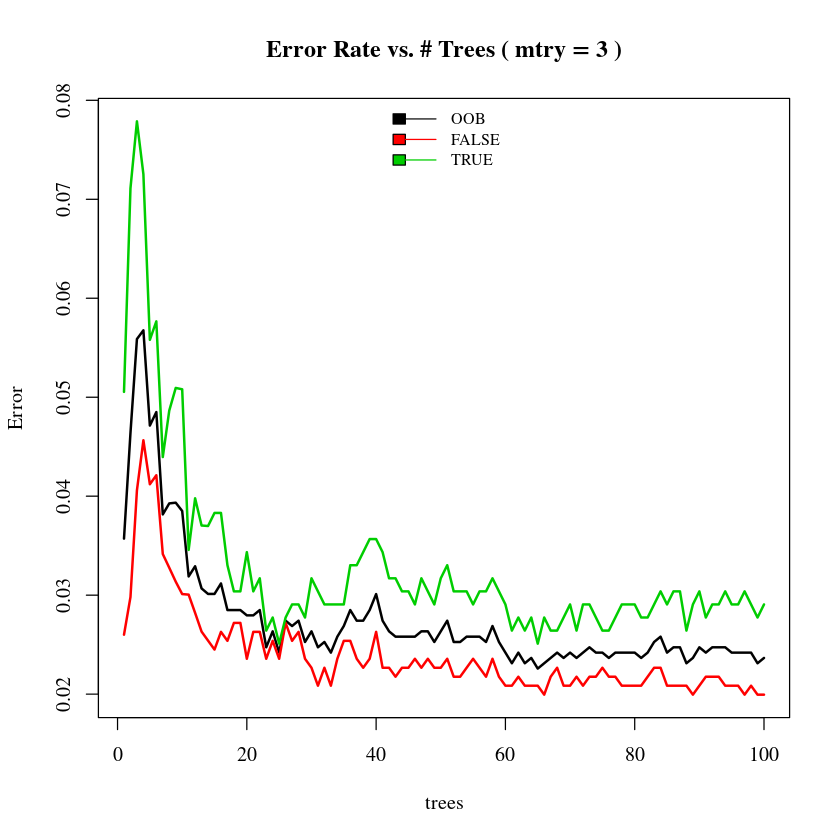

In [17]:
# Plotting Random Forests' trees is complex and can be misleading.  However, we are able to plot the Out of Bag Error Rate (OOB), the FALSE, and TRUE error rates as a function of the # of trees generated.
plot(fitRandomForests, main=paste("Error Rate vs. # Trees ( mtry =",fitRandomForests$mtry,")"), 
     type="l", 
     col.main="black",
     lwd=2,
     lty=1);
legend("top", colnames(fitRandomForests$err.rate),col=1:4,
       cex=0.8, fill=1:5, lwd=1, bty="n")

In [18]:
# Overall, how did our Random Forests model perform
print(fitRandomForests)


Call:
 randomForest(formula = as.factor(CHURN) ~ Gender + Status + Children +      Est.Income + Car.Owner + Age + LongDistance + International +      Local + Dropped + Paymethod + LocalBilltype + LongDistanceBilltype +      Usage + RatePlan, data = custDataRaw, importance = TRUE,      ntree = 100, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.37%
Confusion matrix:
      FALSE TRUE class.error
FALSE  1081   22  0.01994560
TRUE     22  735  0.02906209


In [19]:
# Let's test our model with a small random sample of the overall data set

# Convert "char" data to factors. Required for randomForest package.
validation=validation %>% mutate_if(is.character, as.factor)

randomForestsPredictResponse <- predict(fitRandomForests, validation)

In [20]:
# Overall model performance was excellent on a small sampling of data
confusionMatrix(randomForestsPredictResponse,
                reference=validation$CHURN)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   121    3
     TRUE      1   81
                                         
               Accuracy : 0.9806         
                 95% CI : (0.951, 0.9947)
    No Information Rate : 0.5922         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9596         
 Mcnemar's Test P-Value : 0.6171         
                                         
            Sensitivity : 0.9918         
            Specificity : 0.9643         
         Pos Pred Value : 0.9758         
         Neg Pred Value : 0.9878         
             Prevalence : 0.5922         
         Detection Rate : 0.5874         
   Detection Prevalence : 0.6019         
      Balanced Accuracy : 0.9780         
                                         
       'Positive' Class : FALSE          
                                         

# END OF NOTEBOOK EXCERCISE